# Looking for author name collocations
## Reading in the documents

In [1]:
import sys
sys.path.append('../')

In [2]:
from application.review_obj_class import ReviewObj
from application.namespan_class import NameSpanGenerator
import pandas as pd
import os
%pprint

Pretty printing has been turned OFF


In [3]:
directory = "../../aps_reviews_1000/"
filenames = os.listdir(directory)
reviews = ((file.split('.')[0], open(directory + file).read()) for file in filenames)

In [4]:
review_list = [ReviewObj(file, txt) for (file, txt) in reviews]

In [5]:
spans = NameSpanGenerator.generate(review_list[0])

In [6]:
review_list[0].review_id

'125720170'

In [7]:
spans[0].name

'Co-operativo PFblishing Company'

In [8]:
# for e, x in enumerate(review_list):
#     try:
#         NameSpanGenerator.generate(x)
#     except:
#         print(e, x.review_id)
#         raise
#         print()

In [9]:
spans = [NameSpanGenerator.generate(x) for x in review_list]

In [10]:
len(spans)

1003

## How to reformat the author names?
#### Option 1: underscores instead of spaces
+ Perks: Can look by individual document
+ Pretty impossible to look across the whole dataset tho

In [11]:
review_list[450].coll_toks_ind[:200]

['GESTA', '.', '*', 'stands', 'with', 'a', 'perpetual', 'Cui', 'upon', 'its', 'lips', '.', 'It', 'insists', 'that', 'all', 'ethical', 'systems', 'shall', 'be', 'tested', 'by', 'results', '.', 'It', 'insists', 'upon', 'feeling', ',', 'seeing', ',', 'and', 'knowing', 'about', 'the', 'fruit', 'of', 'anything', 'that', 'claims', 'its', 'attention', 'in', 'the', 'broad', 'world', '-', 'garden', 'of', 'apologetics', '.', 'By', 'the', 'test', 'of', 'fruits', 'many', 'a', 'system', 'of', 'ethics', 'is', 'doomed', 'to', 'die', ';', 'ny', 'tne', 'test', 'or', 'shines', 'perennially', 'with', 'new', 'luster', 'and', 'life', '.', 'Never', 'in', 'the', 'history', 'of', 'Christian', 'apolohas', 'this', 'fact', 'been', 'more', 'clearly', 'set', 'forth', 'than', 'in', 'Gesta', 'Christi', ',', '``', 'A', 'History', 'of', 'Humane', 'Progress', 'under', 'Christianity', ',', '``', 'by', 'Charles', 'Loring', 'Brace', '.', 'As', 'calmly', 'as', 'a', 'man', 'can', 'write', 'of', 'the', 'great', 'moving', 'fo

#### Option 1: blocking out author and pub names
+ Perks: Can look by the whole dataset
+ Differences between individual author names are obscured, as well as the potential influence of gender

In [12]:
review_list[450].coll_toks_all[:200]

['GESTA', '.', '*', 'stands', 'with', 'a', 'perpetual', 'Cui', 'upon', 'its', 'lips', '.', 'It', 'insists', 'that', 'all', 'ethical', 'systems', 'shall', 'be', 'tested', 'by', 'results', '.', 'It', 'insists', 'upon', 'feeling', ',', 'seeing', ',', 'and', 'knowing', 'about', 'the', 'fruit', 'of', 'anything', 'that', 'claims', 'its', 'attention', 'in', 'the', 'broad', 'world', '-', 'garden', 'of', 'apologetics', '.', 'By', 'the', 'test', 'of', 'fruits', 'many', 'a', 'system', 'of', 'ethics', 'is', 'doomed', 'to', 'die', ';', 'ny', 'tne', 'test', 'or', 'shines', 'perennially', 'with', 'new', 'luster', 'and', 'life', '.', 'Never', 'in', 'the', 'history', 'of', 'Christian', 'apolohas', 'this', 'fact', 'been', 'more', 'clearly', 'set', 'forth', 'than', 'in', 'Gesta', 'Christi', ',', '``', 'A', 'History', 'of', 'Humane', 'Progress', 'under', 'Christianity', ',', '``', 'by', 'Charles', 'Loring', 'Brace', '.', 'As', 'calmly', 'as', 'a', 'man', 'can', 'write', 'of', 'the', 'great', 'moving', 'fo

## Trying out NLTK collocations

In [13]:
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [14]:
finder = BigramCollocationFinder.from_words(review_list[450].coll_toks_all)

In [15]:
finder.nbest(bigram_measures.pmi, 10)

[('$', '2.50'), ('*', 'stands'), ('A.', 'C.'), ('Arabian', 'philosophers'), ('Armstrong', 'Son'), ('C.', 'Armstrong'), ('Christendom', "'"), ('Divine', 'revelation'), ('Non-Christian', 'Peoples.'), ('Voila', '!')]

In [16]:
finder_all = BigramCollocationFinder.from_documents([x.coll_toks_all for x in review_list])

In [17]:
finder_all.nbest(bigram_measures.pmi, 10)

[("'sba", 'Iliw'), ("'season", 'Jenovieve'), ('*1..S.', 'bilities'), ('*Es8IMo', 'LIF'), ('*GXNzAL', 'McCaEnLAw'), ('*Mesic', 'mN'), ('*Old', 'Fdendi'), ('*TEE', 'VOICE'), ('*TIIE', 'ExPoSIToWcS'), ('*TIe', 'Soil')]

In [18]:
# hmm... not what i wanted

In [19]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [20]:
tri_finder = TrigramCollocationFinder.from_documents([x.coll_toks_all for x in review_list])

In [21]:
# only trigrams that occur more than 3 times
tri_finder.apply_freq_filter(3)

In [22]:
# it seems that word_filter and ngram_filter only get rid of the filtered statement
tri_finder.apply_ngram_filter(lambda w1, w2, w3: '●' not in w2)

In [23]:
tri_finder.nbest(bigram_measures.pmi, 5)

[('Prof.', '●●●●●●●●●●●●●', '.'), ('which', '●●●●●●●●●', 'gives'), ('.', '●●●●●●●●●●', 'believes'), ('By', '●●●●●●●●●●●●●●●●●●●●●●●', '.'), ('.', '●●●●●●●●●●●●', 'writes')]

In [24]:
scored = tri_finder.score_ngrams(trigram_measures.pmi)

In [25]:
scored[:10]

[(('Prof.', '●●●●●●●●●●●●●', '.'), 14.596982942555456), (('which', '●●●●●●●●●', 'gives'), 11.482847260336335), (('.', '●●●●●●●●●●', 'believes'), 11.219230284824388), (('By', '●●●●●●●●●●●●●●●●●●●●●●●', '.'), 11.08940912415336), (('.', '●●●●●●●●●●●●', 'writes'), 10.54064884491875), (('But', '●●●●●●●●●●', 'has'), 10.366818209472527), (('.', '●●●●●●●●●', 'writes'), 10.16213722166502), (('.', '●●●●●●●●●●●', 'writes'), 10.03701742237092), (('.', '●●●●●●●●●●●●●●●●●', 'gives'), 9.98517630428326), (('By', '●●●●●●●●●●●●●●●●●●', '.'), 9.904984553015922)]

In [26]:
len(scored)

280

In [27]:
# testing something - will the filter be different if I apply after scoring using PMI?

In [28]:
tri_finder2 = TrigramCollocationFinder.from_documents([x.coll_toks_all for x in review_list])
tri_finder2.apply_freq_filter(3)
scored2 = tri_finder.score_ngrams(trigram_measures.pmi)

In [29]:
scored2 = [(trigram,pmi) for (trigram,pmi) in scored if '●' in trigram[1]]

In [30]:
len(scored2)

280

In [31]:
scored == scored2

True

In [32]:
# nope

## It's graph time 😈

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [34]:
pmi_df = pd.DataFrame()

In [35]:
pmi_df['trigram'] = [x[0] for x in scored]
pmi_df['pmi'] = [x[1] for x in scored]

In [36]:
pmi_df.head()

,trigram,pmi
0,"(Prof., ●●●●●●●●●●●●●, .)",14.596983
1,"(which, ●●●●●●●●●, gives)",11.482847
2,"(., ●●●●●●●●●●, believes)",11.219230
3,"(By, ●●●●●●●●●●●●●●●●●●●●●●●, .)",11.089409
4,"(., ●●●●●●●●●●●●, writes)",10.540649


In [37]:
pmi_df['preceding_word'] = pmi_df.trigram.map(lambda x: x[0])
pmi_df['person_name'] = pmi_df.trigram.map(lambda x: x[1])
pmi_df['following_word'] = pmi_df.trigram.map(lambda x: x[2])

In [38]:
pmi_df.head()

,trigram,pmi,preceding_word,person_name,following_word
0,"(Prof., ●●●●●●●●●●●●●, .)",14.596983,Prof.,●●●●●●●●●●●●●,.
1,"(which, ●●●●●●●●●, gives)",11.482847,which,●●●●●●●●●,gives
2,"(., ●●●●●●●●●●, believes)",11.219230,.,●●●●●●●●●●,believes
3,"(By, ●●●●●●●●●●●●●●●●●●●●●●●, .)",11.089409,By,●●●●●●●●●●●●●●●●●●●●●●●,.
4,"(., ●●●●●●●●●●●●, writes)",10.540649,.,●●●●●●●●●●●●,writes


In [39]:
pmi_df.pmi

0      14.596983
1      11.482847
2      11.219230
3      11.089409
4      10.540649
         ...    
275     1.696906
276     1.462755
277     1.366912
278     1.021641
279     0.744606
Name: pmi, Length: 280, dtype: float64

In [40]:
pmi_df.preceding_word.value_counts()[:10]

.       63
by      51
of      43
,       35
that    12
and     10
in       9
to       9
``       8
the      8
Name: preceding_word, dtype: int64

In [41]:
pmi_df.groupby(['preceding_word']).following_word.value_counts()

preceding_word  following_word
'               's                 1
,               ,                 17
                's                 6
                has                3
                is                 3
                                  ..
to              .                  1
                for                1
which           has                4
                gives              1
with            's                 2
Name: following_word, Length: 70, dtype: int64

In [42]:
pmi_df.pivot_table('pmi', index='preceding_word',columns='following_word')
# this does the same thing
# pmi_df.groupby(['preceding_word','following_word'])['pmi'].aggregate('mean').unstack()

following_word,','s,",",.,;,and,believes,does,for,gives,has,in,is,of,shows,was,who,writes
preceding_word,,,,,,,,,,,,,,,,,,
',NaN,8.093056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
",",NaN,5.663834,3.408622,2.637720,NaN,NaN,NaN,NaN,NaN,NaN,5.244155,NaN,2.929618,2.167661,8.479621,4.814724,NaN,NaN
.,NaN,8.011240,3.625919,5.877724,NaN,2.531267,11.21923,7.831828,NaN,9.985176,7.358731,NaN,5.182107,NaN,NaN,5.801826,NaN,10.144141
But,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.366818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
By,NaN,NaN,8.960031,9.441673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In,NaN,9.176462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prof.,NaN,NaN,NaN,14.596983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
``,NaN,7.148468,3.390998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.155815,NaN,5.225133,NaN,NaN,NaN,NaN,NaN
and,NaN,6.109938,2.929353,3.752410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


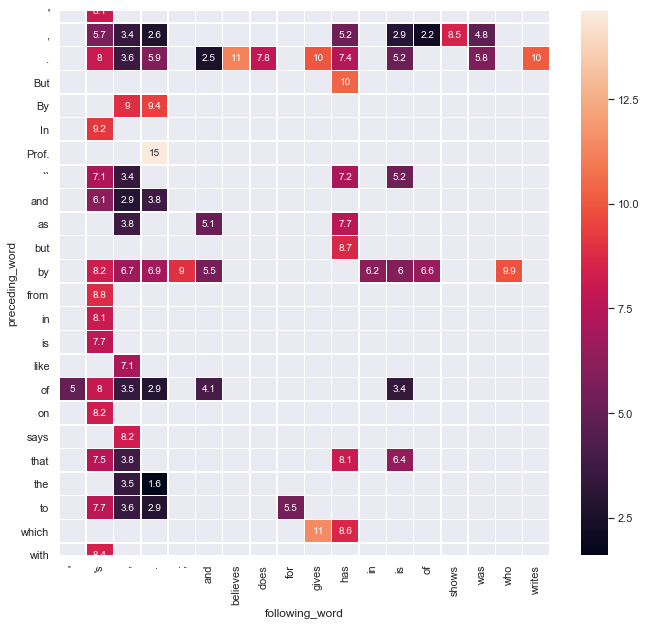

In [43]:
pivot_data = pmi_df.groupby(['preceding_word','following_word'])['pmi'].aggregate('mean').unstack()

f, ax = plt.subplots(figsize=(11, 10))
sns.heatmap(pivot_data, annot=True, linewidths=.5, ax=ax)

## More collocations, more power?

In [44]:
from nltk.collocations import *

In [45]:
dir(nltk.collocations)

['AbstractCollocationFinder', 'BigramAssocMeasures', 'BigramCollocationFinder', 'ContingencyMeasures', 'FreqDist', 'QuadgramAssocMeasures', 'QuadgramCollocationFinder', 'TrigramAssocMeasures', 'TrigramCollocationFinder', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_itertools', 'demo', 'iteritems', 'ngrams', 'print_function', 'ranks_from_scores', 'spearman_correlation']

In [46]:
afinder = nltk.collocations.AbstractCollocationFinder()

TypeError: __init__() missing 2 required positional arguments: 'word_fd' and 'ngram_fd'

In [47]:
help(nltk.collocations)

Help on module nltk.collocations in nltk:

NAME
    nltk.collocations

DESCRIPTION
    Tools to identify collocations --- words that often appear consecutively
    --- within corpora. They may also be used to find other associations between
    word occurrences.
    See Manning and Schutze ch. 5 at http://nlp.stanford.edu/fsnlp/promo/colloc.pdf
    and the Text::NSP Perl package at http://ngram.sourceforge.net
    
    Finding collocations requires first calculating the frequencies of words and
    their appearance in the context of other words. Often the collection of words
    will then requiring filtering to only retain useful content terms. Each ngram
    of words may then be scored according to some association measure, in order
    to determine the relative likelihood of each ngram being a collocation.
    
    The ``BigramCollocationFinder`` and ``TrigramCollocationFinder`` classes provide
    these functionalities, dependent on being provided a function which scores a
    ngram

NLTK doesn't seem super adaptable in terms of collocation finders. I'm gonna try using other packages and see how that goes.

### Other stuff I've found online:
+ https://github.com/emmajbrown/word-embeddings/blob/master/HW_3.ipynb
   + but I kinda don't understand what this is doing
+ http://www.pitt.edu/~naraehan/presentation/Movie%20Reviews%20sentiment%20analysis%20with%20Scikit-Learn.html#A-detour:-try-out-CountVectorizer-&-TF-IDF 
   + plus a bunch of other stuff from my data science class that i can't share bc the repo got deleted

## Word2Vec?

In [48]:
from gensim.models import Word2Vec

In [53]:
["●" if "●" in x else x for x in review_list[5].coll_toks_all]

['Z*e', 'IFamiIW', 'in', 'Uomaun', 'LaW', '.', 'x', '.', 'The', 'History', 'and', 'Prineciples', 'of', 'the', 'Civil', 'Law', 'of', 'Rome', '.', 'By', 'SHELDON', 'Amos', ',', 'M.', 'A.', 'London', '.', 'i883', '.', '2', '.', 'Outlines', 'of', 'Roman', 'Law', '.', 'By', 'WILLIAM', 'C.', 'MOREY', ',', 'Ph', '.', 'D.', 'New', 'York', '.', '1889', '.', '3', '.', 'Gallus', ',', 'or', 'Roman', 'Scenes', 'of', 'the', 'Time', 'of', 'Augustus', '.', 'By', '●', '.', 'Translated', 'by', 'the', '●', '.', 'London', '.', '1888', '.', '4', '.', 'The', 'Ancient', 'City', '.', 'By', 'FUSTEL', 'DE', 'COULANGE', '.', 'Translated', 'by', 'WILLARD', 'SMALL', '.', 'Boston', '.', 'I889', '.', 'N', 'attempting', 'an', 'exhaustive', 'study', 'of', 'the', 'great', 'social', 'institutions', 'of', 'the', 'family', 'and', 'marriage', 'in', 'Roman', 'Civil', 'Law', ',', 'it', 'is', 'necessary', 'at', 'the', 'very', 'outset', 'to', 'understand', 'certain', 'fundamental', 'conceptions', '.', 'Neither', 'the', 'instit

In [55]:
training_data = [["●" if "●" in x else x for x in rev.coll_toks_all] for rev in review_list]

In [ ]:
# CBOW
model = Word2Vec(training_data, min_count=1)

In [59]:
model.most_similar(positive="●")

/Users/eva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('WVaterford', 0.8022407293319702), ('Hazlitt', 0.8014094829559326), ('author', 0.7951412796974182), ('Cozzen', 0.7878138422966003), ('Clough', 0.785640299320221), ('narrator', 0.7785385251045227), ('Frankenstein', 0.774620532989502), ('Wallack', 0.773840069770813), ('Walsden', 0.7710344791412354), ('Mulhall', 0.7706570625305176)]

In [60]:
model.most_similar(negative="●")

/Users/eva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('under.CELT', 0.5083080530166626), ('robably', 0.4612523317337036), ('neglectful', 0.4524801969528198), ('confide', 0.4476316571235657), ('blurt', 0.43642622232437134), ('egotist', 0.4187397062778473), ('colleges.', 0.3950512707233429), ('evangelicalism', 0.3909662365913391), ('floodtide', 0.39065444469451904), ('bav', 0.38543790578842163)]

In [64]:
model.wv.distances("●")

array([0.6113893, 0.5196396, 0.7101275, ..., 1.0181108, 0.7943841,
       0.5493039], dtype=float32)

In [65]:
# skip-gram
model = Word2Vec(training_data, min_count=1, sg=1)

In [66]:
model.most_similar(positive="●")

/Users/eva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Whitman', 0.8136881589889526), ('editor', 0.8043989539146423), ('Milton', 0.8015763163566589), ('Gray', 0.7990477085113525), ('Shakespeare', 0.7977945804595947), ('Spencer', 0.7970021963119507), ('Emerson', 0.7959649562835693), ('Stevenson', 0.7938148379325867), ('Michie', 0.7919736504554749), ('Arnold', 0.7818419933319092)]

In [67]:
model.most_similar(negative="●")

/Users/eva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('AND', -0.08245109021663666), ('OF', -0.103915736079216), ('BY', -0.17446070909500122), ('TO', -0.1749747097492218), ('THE', -0.18793979287147522), ('und', -0.19661270081996918), ('pp', -0.20645122230052948), ('S', -0.214418426156044), ('Solo', -0.22175608575344086), ('By', -0.226176917552948)]

In [69]:
model.wv.buckets_word("●")

AttributeError: 'Word2VecKeyedVectors' object has no attribute 'buckets_word'

## Stuff I was doing before

In [44]:
# # this code is stolen from Ben Naismith, Ling PhD student, who in turn adapted it from Dr. Na-Rae Han

# # Finding word in a tokenized text
# def concord_toks(text, word, num):
#     padding = [('')] * num             # non-word padding, in the specified size
#     padded = padding + text + padding   # pad in front and back
#     outlist = []
#     for i in range(len(padded)):
#         if padded[i] == word:
#             outlist.append((padded[i-num:i], padded[i], padded[i+1:i+1+num]))
#     return outlist

# def flatten(outlist):
#     flatlist = []
#     for x in outlist:
#         flatlist.append((' '.join(x[0]), x[1], ' '.join(x[2])))
#     return flatlist

# def concordance(text, word, num):
#     return flatten(concord_toks(text, word, num))

In [45]:
# concordance(ex_review.cleaned_toks, 'Grahame', 3)

In [46]:
# ex_people[0].name_parts

In [47]:
# ex_people[0].name_part_count

In [48]:
# ex_people[0].full_name

In [49]:
# toks = []
# for person in ex_people:
#     num_toks = person.name_part_count
#     for e, x in enumerate(ex_review.cleaned_toks):
#         if x.lower() == person.name_parts[0]:
#             if person.full_name.split() == ex_review.cleaned_toks[e:e + num_toks]:
#                 toks.append((e, e+num_toks))

In [50]:
# def get_toks_for_people(ReviewObj):
#     for person in ReviewObj.person_names:
#         num_toks = person.name_part_count
#         for e, x in enumerate(ReviewObj.cleaned_toks):
#             if x.lower() == person.name_parts[0]:
#                 if person.full_name.split() == ReviewObj.cleaned_toks[e:e + num_toks]:
#                     person.review_loc_toks = (e, e+num_toks)
#     return ReviewObj

In [51]:
# ex_review_2 = get_toks_for_people(ex_review)

In [52]:
# for x in ex_review_2.person_names:
#     print(x.review_loc_toks)
#     print(ex_review_2.cleaned_toks[x.review_loc_toks[0]:x.review_loc_toks[1]])

In [53]:
# for e, x in enumerate(review_list):
#     review_list[e] = get_toks_for_people(x)

In [54]:
# print(review_list[0].cleaned_text)

In [55]:
# for x in review_list[0].person_names:
#     print(x)
#     print(x.review_loc_toks)
#     print(review_list[0].cleaned_toks[x.review_loc_toks[0]:x.review_loc_toks[1]])